In [1]:
#these commands can be run on the shell and get the data with the command wget
#the cell needs to be run only once
#!for ((y=94; y<=99; y+=1)); do wget \
#http://www2.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

#!for ((y=0; y<=1; y+=1)); do wget \
#http://www2.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0$y\totals.zip; done

#!for ((y=2; y<=9; y+=1)); do wget \
#http://www2.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

#!for ((y=10; y<=14; y+=1)); do wget \
#http://www2.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done

In [2]:
from __future__ import print_function, division
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pylab as pl
%pylab inline
#import urllib.request
#import choroplethNYC as cp
#from censusAPI import myAPI
#import urllib.request
import seaborn as sns
import urllib
import requests
import json
import io
import fiona
import shapely
from shapely.geometry import Point
import zipfile
from sklearn import preprocessing
from scipy.cluster.vq import kmeans2, whiten
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn.cluster
from sklearn.cluster import DBSCAN

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
PUIDATA = os.getenv("PUIDATA")
print(PUIDATA)

/home/cusp/ep2247/PUIdata


In [4]:
url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
urllib.request.urlretrieve(url, 'nyc.zip')
os.system('unzip -d %s nyc.zip'%(os.getenv('PUIDATA')))
zipshp= gpd.GeoDataFrame.from_file((os.getenv('PUIDATA') + 
                                    '/ZIP_CODE_040114.shp'))
zipshp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [5]:
zipshp['ZIPCODE'] = zipshp['ZIPCODE'].astype(int)
zipNYC = zipshp['ZIPCODE'].unique()
zipNYC

array([11436, 11213, 11212, 11225, 11218, 11226, 11219, 11210, 11230,
       11204, 10471, 10470, 10466, 10467, 10463, 10475, 10464, 10469,
       10468, 10458, 10034, 10033, 10462, 10040, 10453, 10465, 10461,
       10457, 10460, 10032, 10452, 10456, 10472, 10031, 10039, 10459,
       10451, 10473, 10030, 10027, 10474, 10455, 10037, 10024, 10454,
       10026, 10035, 10048, 10025, 11357, 10029,    83, 11356, 11359,
       11360, 11105, 10128, 10023, 11363, 10028, 11354, 11102, 11370,
       10021, 11358, 11362, 10044, 11369, 11103, 11106, 11368, 11377,
       11355, 11101, 11364, 10018, 10020, 11005, 10017, 10001, 10011,
       10016, 11104, 11109, 10010, 11367, 10014, 10003, 11222, 10002,
       11378, 10009, 10012, 10013, 10007, 11237, 11385, 10038, 11206,
       10006, 11412, 10005, 11251, 10004, 11411, 11201, 11205, 11208,
       11207, 11413, 11217, 11238, 11231, 11422, 11420, 11417, 11215,
       11232, 11430, 11203, 11239, 11236, 11220, 10301, 10303, 11234,
       10302, 11693,

In [6]:
est = []

NYCzip = zipshp.ZIPCODE.unique()

for i in range(94,100):
    fname = 'zbp' + str(i) + 'totals.zip'
    zf = zipfile.ZipFile(fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df.columns = [x.lower() for x in df.columns]
    df = (df[(df['zip'].astype(str).str.startswith('1'))])
    df = df[['zip','name','est']]
    df['year'] = i
    est.append(df)

for i in range(0,15):
    i = str(i).zfill(2)
    fname = 'zbp' + str(i) + 'totals.zip'
    zf = zipfile.ZipFile(fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df.columns = [x.lower() for x in df.columns]
    df = (df[(df['zip'].astype(str).str.startswith('1'))])
    df = df[['zip','name','est']]
    df['year'] = i
    est.append(df)
    
est = pd.concat(est)

In [7]:
est[::10000]

,zip,name,est,year
0,1001,"Agawam, MA",439,94
3283,10927,"Haverstraw, NY",159,96
3859,12439,"HENSONVILLE, NY",16,98
4604,13777,"GLEN AUBREY, NY",4,00
5261,15331,"ELLSWORTH, PA",6,02
6000,16878,"WEST DECATUR, PA",16,04
6728,18655,"SHICKSHINNY, PA",86,06
253,1704,"FRAMINGHAM, MA",8,09
3623,12073,"GALLUPVILLE, NY",2,11
4475,13788,"HOBART, NY",28,13


In [8]:
est.shape

(97171, 4)

In [9]:
estshp = zipshp.merge(est, left_on='ZIPCODE', right_on = 'zip')
estshp.drop(['STATE','BLDGZIP','URL','zip','name'], inplace=True, axis=1)
estshp.head()

,ZIPCODE,PO_NAME,POPULATION,AREA,COUNTY,ST_FIPS,CTY_FIPS,SHAPE_AREA,SHAPE_LEN,geometry,est,year
0,11436,Jamaica,18681.0,2.269930e+07,Queens,36,081,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",51,94
1,11436,Jamaica,18681.0,2.269930e+07,Queens,36,081,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",50,95
2,11436,Jamaica,18681.0,2.269930e+07,Queens,36,081,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",53,96
3,11436,Jamaica,18681.0,2.269930e+07,Queens,36,081,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",51,97
4,11436,Jamaica,18681.0,2.269930e+07,Queens,36,081,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",51,98


In [10]:
estshp.columns = [x.lower() for x in estshp.columns]
estshp['zipcode'] = estshp['zipcode'].astype(int)
estshp.head()

,zipcode,po_name,population,area,county,st_fips,cty_fips,shape_area,shape_len,geometry,est,year
0,11436,Jamaica,18681.0,2.269930e+07,Queens,36,081,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",51,94
1,11436,Jamaica,18681.0,2.269930e+07,Queens,36,081,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",50,95
2,11436,Jamaica,18681.0,2.269930e+07,Queens,36,081,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",53,96
3,11436,Jamaica,18681.0,2.269930e+07,Queens,36,081,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",51,97
4,11436,Jamaica,18681.0,2.269930e+07,Queens,36,081,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",51,98


In [11]:
estshp.shape

(5307, 12)

In [12]:
zipPivot = pd.pivot_table(estshp, index =['zipcode'], 
                          columns = ['year'], values = 'est')
zipPivot

year,94,95,96,97,98,99,00,01,02,03,...,05,06,07,08,09,10,11,12,13,14
zipcode,,,,,,,,,,,,,,,,,,,,,
10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,7317.0,7188.0,7141.0,7084.0,...,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7227.0,7235.0,7273.0,7369.0
10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,2277.0,2543.0,2269.0,2402.0,...,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2912.0,2954.0,2988.0,2972.0
10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,3683.0,3602.0,3616.0,3704.0,...,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4159.0,4214.0,4277.0,4333.0
10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1294.0,1247.0,1253.0,1252.0,...,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1404.0,1442.0,1479.0,1554.0
10005,1076.0,1109.0,1216.0,1227.0,1270.0,1242.0,1287.0,1249.0,1244.0,1200.0,...,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1301.0,1273.0,1296.0,1321.0
10006,1061.0,1002.0,969.0,990.0,1030.0,1059.0,1067.0,1026.0,934.0,862.0,...,870.0,874.0,863.0,845.0,828.0,843.0,834.0,850.0,852.0,855.0
10007,1307.0,1274.0,1254.0,1287.0,1282.0,1303.0,1327.0,1233.0,1620.0,1603.0,...,1311.0,1292.0,1284.0,1313.0,1277.0,1330.0,1368.0,1400.0,1424.0,1451.0
10009,634.0,633.0,673.0,747.0,786.0,804.0,860.0,869.0,921.0,953.0,...,1029.0,1016.0,1027.0,1066.0,1049.0,1090.0,1128.0,1176.0,1220.0,1248.0
10010,3019.0,2987.0,3029.0,3112.0,3152.0,3143.0,3203.0,3178.0,3085.0,3045.0,...,3060.0,3047.0,2948.0,3000.0,2938.0,2981.0,3022.0,3068.0,3091.0,3137.0


In [13]:
zipPivot.shape

(245, 21)

In [14]:
years = list(zipPivot.columns)
years

[94,
 95,
 96,
 97,
 98,
 99,
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14']

In [15]:
zips = list(zipPivot.index)
zips

[10001,
 10002,
 10003,
 10004,
 10005,
 10006,
 10007,
 10009,
 10010,
 10011,
 10012,
 10013,
 10014,
 10016,
 10017,
 10018,
 10019,
 10020,
 10021,
 10022,
 10023,
 10024,
 10025,
 10026,
 10027,
 10028,
 10029,
 10030,
 10031,
 10032,
 10033,
 10034,
 10035,
 10036,
 10037,
 10038,
 10039,
 10040,
 10041,
 10043,
 10044,
 10045,
 10047,
 10048,
 10055,
 10065,
 10069,
 10075,
 10080,
 10081,
 10096,
 10103,
 10104,
 10105,
 10106,
 10107,
 10110,
 10111,
 10112,
 10115,
 10118,
 10119,
 10120,
 10121,
 10122,
 10123,
 10128,
 10151,
 10152,
 10153,
 10154,
 10155,
 10158,
 10162,
 10165,
 10166,
 10167,
 10168,
 10169,
 10170,
 10171,
 10172,
 10173,
 10174,
 10175,
 10176,
 10177,
 10178,
 10196,
 10203,
 10260,
 10265,
 10270,
 10271,
 10275,
 10278,
 10279,
 10280,
 10281,
 10282,
 10285,
 10286,
 10301,
 10302,
 10303,
 10304,
 10305,
 10306,
 10307,
 10308,
 10309,
 10310,
 10312,
 10314,
 10451,
 10452,
 10453,
 10454,
 10455,
 10456,
 10457,
 10458,
 10459,
 10460,
 10461,


In [16]:
zipPivot = zipPivot.dropna(0)

In [17]:
zipPivotScale = preprocessing.scale(zipPivot)
zipPivotScale.std(axis = 0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [18]:
whiten = whiten(zipPivot)

In [19]:
print(zipPivot.mean(axis = 0), whiten.mean(axis = 0))
print(zipPivot.std(axis = 0), whiten.std(axis = 0))

year
94     804.082609
95     819.917391
96     830.660870
97     851.173913
98     862.760870
99     868.821739
00     883.460870
01     884.543478
02     893.682609
03     904.669565
04     922.343478
05     925.791304
06     930.191304
07     931.773913
08     937.139130
09     941.339130
10     954.934783
11     966.252174
12     982.378261
13    1000.613043
14    1015.339130
dtype: float64 [ 0.6900463   0.68680711  0.69424482  0.69661541  0.69980377  0.70565812
  0.70501706  0.70291199  0.73275125  0.74176541  0.73536675  0.74241307
  0.74139522  0.7519259   0.75836433  0.77199751  0.78233598  0.78860926
  0.79404219  0.80130409  0.80681488]
year
94    1167.800380
95    1196.414026
96    1199.105193
97    1224.535576
98    1235.550041
99    1233.907242
00    1255.838715
01    1261.143228
02    1222.286218
03    1222.276827
04    1256.998813
05    1249.722719
06    1257.386142
07    1241.885846
08    1238.432538
09    1222.014583
10    1223.282002
11    1227.933332
12    1239.88481

In [20]:
nycZip = zipPivot.index
type(nycZip)

pandas.indexes.numeric.Int64Index

In [21]:
zipScale = pd.DataFrame(zipPivotScale)

In [22]:
zipScale.set_index(nycZip, inplace = True)
zipScale.columns = years
zipScale.head()

,94,95,96,97,98,99,00,01,02,03,...,05,06,07,08,09,10,11,12,13,14
zipcode,,,,,,,,,,,,,,,,,,,,,
10001,5.316344,5.250485,5.218857,5.158342,5.184071,5.168994,5.134076,5.009110,5.122321,5.066616,...,5.121246,5.168621,5.339990,5.288228,5.218874,5.149896,5.109726,5.053904,5.023010,5.048784
10002,0.840944,0.836886,0.909606,0.980322,0.924872,0.987782,1.112068,1.317910,1.127655,1.227706,...,1.408344,1.399441,1.414824,1.419283,1.503796,1.570567,1.588027,1.593633,1.591526,1.554814
10003,2.104182,2.141951,2.161595,2.196490,2.259978,2.266186,2.234081,2.159456,2.232092,2.295254,...,2.358622,2.374215,2.515549,2.536025,2.589615,2.587264,2.605770,2.612073,2.623774,2.636300
10004,0.266823,0.254716,0.252687,0.263388,0.254075,0.295786,0.327617,0.288030,0.294613,0.284787,...,0.268010,0.303518,0.353641,0.355141,0.358928,0.362984,0.357269,0.371506,0.383099,0.428034
10005,0.233354,0.242151,0.322056,0.307583,0.330320,0.303096,0.322031,0.289619,0.287233,0.242150,...,0.231121,0.262072,0.275364,0.286356,0.272817,0.254842,0.273205,0.234905,0.236550,0.242886


#### Task 2

##### get elbows 

In [23]:
def elbow(data1,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data1) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data1, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data1.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data1)**2)/data1.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

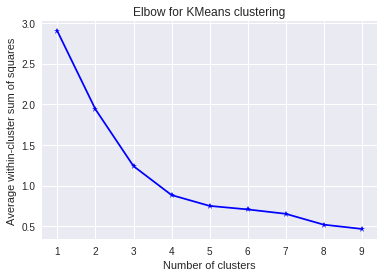

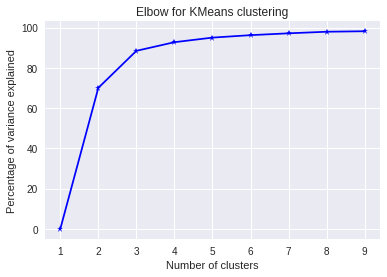

In [24]:
elbow(zipScale,range(1,10))

##### Figure 1: Map of kmeans clustering.  In this plot you can see that 3 clusters would be the best option to use for this data.

For n_clusters = 2 The average silhouette_score is : 0.831958913932
For n_clusters = 3 The average silhouette_score is : 0.691165494902
For n_clusters = 4 The average silhouette_score is : 0.565970353803
For n_clusters = 5 The average silhouette_score is : 0.568206414682
For n_clusters = 6 The average silhouette_score is : 0.564464406587


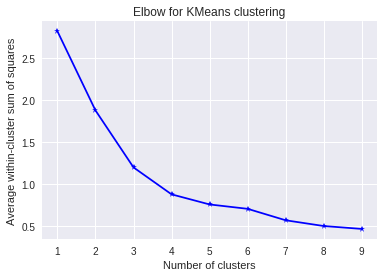

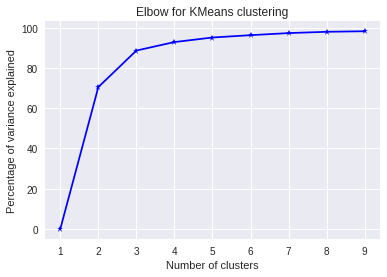

In [25]:
X=np.asarray(zipScale.iloc[:,:-1])
range_n_clusters = [2, 3, 4, 5, 6]


for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
#elbow
elbow(X,range(1,10))

##### Figure 2: Map of kmeans clustering.  In this plot you can see that 3 clusters would be the best option to use for this data.

In [26]:
#get clusters for each zipcode
clusters = KMeans(n_clusters = 6, random_state = 324)
cluster_labels = clusters.fit_predict(X)
zipScale['clusterLabels'] = cluster_labels

zipScale.head()

,94,95,96,97,98,99,00,01,02,03,...,06,07,08,09,10,11,12,13,14,clusterLabels
zipcode,,,,,,,,,,,,,,,,,,,,,
10001,5.316344,5.250485,5.218857,5.158342,5.184071,5.168994,5.134076,5.009110,5.122321,5.066616,...,5.168621,5.339990,5.288228,5.218874,5.149896,5.109726,5.053904,5.023010,5.048784,5
10002,0.840944,0.836886,0.909606,0.980322,0.924872,0.987782,1.112068,1.317910,1.127655,1.227706,...,1.399441,1.414824,1.419283,1.503796,1.570567,1.588027,1.593633,1.591526,1.554814,3
10003,2.104182,2.141951,2.161595,2.196490,2.259978,2.266186,2.234081,2.159456,2.232092,2.295254,...,2.374215,2.515549,2.536025,2.589615,2.587264,2.605770,2.612073,2.623774,2.636300,4
10004,0.266823,0.254716,0.252687,0.263388,0.254075,0.295786,0.327617,0.288030,0.294613,0.284787,...,0.303518,0.353641,0.355141,0.358928,0.362984,0.357269,0.371506,0.383099,0.428034,0
10005,0.233354,0.242151,0.322056,0.307583,0.330320,0.303096,0.322031,0.289619,0.287233,0.242150,...,0.262072,0.275364,0.286356,0.272817,0.254842,0.273205,0.234905,0.236550,0.242886,0


In [27]:
#make new dataframe that shows only the zipcodes and clusters
cluster = zipScale[['clusterLabels']]
cluster.head()

,clusterLabels
zipcode,
10001,5
10002,3
10003,4
10004,0
10005,0


#### Task 3

In [28]:
zipCluster = zipshp.merge(cluster, left_on = 'ZIPCODE', right_index = True)
zipCluster.drop(['BLDGZIP','PO_NAME','STATE','COUNTY','URL','CTY_FIPS',
                 'ST_FIPS'], axis = 1, inplace = True)
zipCluster.head()

,ZIPCODE,POPULATION,AREA,SHAPE_AREA,SHAPE_LEN,geometry,clusterLabels
0,11436,18681.0,2.269930e+07,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",2
1,11213,62426.0,2.963100e+07,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",0
2,11212,83866.0,4.197210e+07,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",0
3,11225,56527.0,2.369863e+07,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",2
4,11218,72280.0,3.686880e+07,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",0


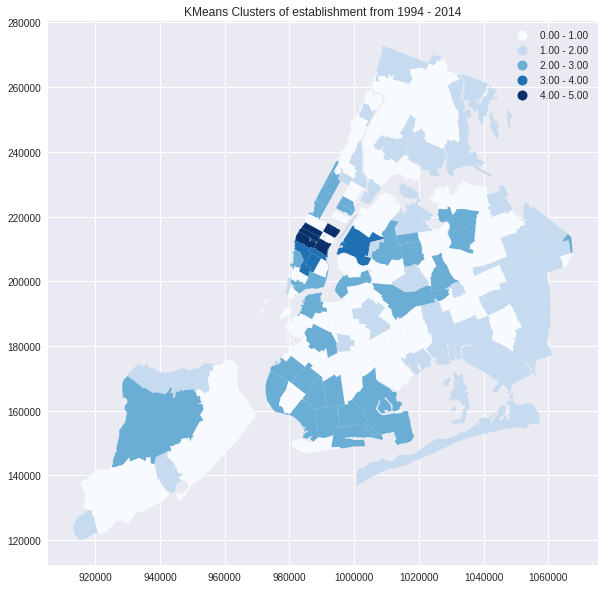

In [29]:
zipCluster.plot(column = 'clusterLabels', figsize = (10,10), cmap = 'Blues',
               scheme='equal_interval', legend = True)
pl.title('KMeans Clusters of establishment from 1994 - 2014')
pl.legend()

##### Figure 3: Map of Kmeans clustering on zipcode from years 1994 - 2014.  This map uses 6 clusters, the scale for this map ranges from 0 - 5.  High areas of clustering can be found in Lower Manhattan and Williamsburg.  The largest areas of clusters are found in Bronx, South Brooklyn, and parts of Queens

In [30]:
cluster.head()

,clusterLabels
zipcode,
10001,5
10002,3
10003,4
10004,0
10005,0


In [31]:
clusterGroup = zipCluster.groupby('clusterLabels').mean()

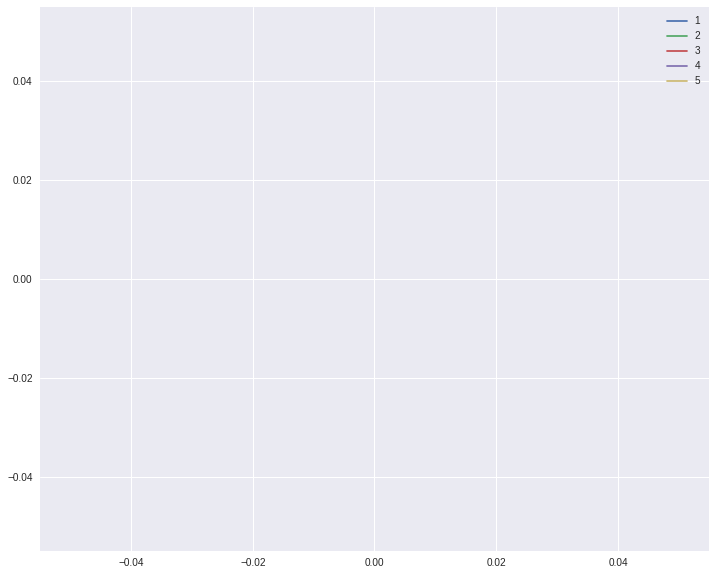

In [32]:
plt.figure(figsize = (12,10))
plt.plot(clusterGroup.ix[:,5:].T)
plt.legend('12345')

#### Task 4
##### DBscan Clustering

In [33]:
dbCluster = DBSCAN(eps = 0.5, min_samples = 5).fit(zipScale)
labels = (dbCluster.labels_).astype(int)
num_clusters = 5

for i in range(num_clusters):
    clusters = 

SyntaxError: invalid syntax (<ipython-input-33-eb7c2808466c>, line 6)

In [ ]:
### used the DBscan centroid function from the UInotebook
### thanksgiving clusters

def getCentroid(points):
    #print points[:,0], np.nanmean(points[:,0])
    return np.nanmean(points[:,0]), np.nanmean(points[:,1])